In [92]:
#Importing libraries
from scipy.io import arff
import pandas as pd
import numpy as np
pd.set_option("display.max_columns",None)
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.impute import KNNImputer

In [93]:
#Importing dataset
data = arff.loadarff(r'C:\Users\Administrator\Downloads\ML project\chronic_kidney_disease.arff')
df=pd.DataFrame(data[0])


df

age    bp        sg    al    su        rbc           pc            pcc  \
0    48.0  80.0  b'1.020'  b'1'  b'0'       b'?'    b'normal'  b'notpresent'   
1     7.0  50.0  b'1.020'  b'4'  b'0'       b'?'    b'normal'  b'notpresent'   
2    62.0  80.0  b'1.010'  b'2'  b'3'  b'normal'    b'normal'  b'notpresent'   
3    48.0  70.0  b'1.005'  b'4'  b'0'  b'normal'  b'abnormal'     b'present'   
4    51.0  80.0  b'1.010'  b'2'  b'0'  b'normal'    b'normal'  b'notpresent'   
..    ...   ...       ...   ...   ...        ...          ...            ...   
395  55.0  80.0  b'1.020'  b'0'  b'0'  b'normal'    b'normal'  b'notpresent'   
396  42.0  70.0  b'1.025'  b'0'  b'0'  b'normal'    b'normal'  b'notpresent'   
397  12.0  80.0  b'1.020'  b'0'  b'0'  b'normal'    b'normal'  b'notpresent'   
398  17.0  60.0  b'1.025'  b'0'  b'0'  b'normal'    b'normal'  b'notpresent'   
399  58.0  80.0  b'1.025'  b'0'  b'0'  b'normal'    b'normal'  b'notpresent'   

                ba    bgr    bu   sc    sod  pot  hemo   pcv    wbcc  rbcc  \
0    b'notpresent'  121.0  36.0  1.2    NaN  NaN  15.4  44.0  7800.0   5.2   
1    b'notpresent'    NaN  18.0  0.8    NaN  NaN  11.3  38.0  6000.0   NaN   
2    b'notpresent'  423.0  53.0  1.8    NaN  NaN   9.6  31.0  7500.0   NaN   
3    b'notpresent'  117.0  56.0  3.8  111.0  2.5  11.2  32.0  6700.0   3.9   
4    b'notpresent'  106.0  26.0  1.4    NaN  NaN  11.6  35.0  7300.0   4.6   
..             ...    ...   ...  ...    ...  ...   ...   ...     ...   ...   
395  b'notpresent'  140.0  49.0  0.5  150.0  4.9  15.7  47.0  6700.0   4.9   
396  b'notpresent'   75.0  31.0  1.2  141.0  3.5  16.5  54.0  7800.0   6.2   
397  b'notpresent'  100.0  26.0  0.6  137.0  4.4  15.8  49.0  6600.0   5.4   
398  b'notpresent'  114.0  50.0  1.0  135.0  4.9  14.2  51.0  7200.0   5.9   
399  b'notpresent'  131.0  18.0  1.1  141.0  3.5  15.8  53.0  6800.0   6.1   

        htn      dm    cad    appet      pe     ane      class  
0    b'yes'  b'yes'  b'no'  b'good'   b'no'   b'no'     b'ckd'  
1     b'no'   b'no'  b'no'  b'good'   b'no'   b'no'     b'ckd'  
2     b'no'  b'yes'  b'no'  b'poor'   b'no'  b'yes'     b'ckd'  
3    b'yes'   b'no'  b'no'  b'poor'  b'yes'  b'yes'     b'ckd'  
4     b'no'   b'no'  b'no'  b'good'   b'no'   b'no'     b'ckd'  
..      ...     ...    ...      ...     ...     ...        ...  
395   b'no'   b'no'  b'no'  b'good'   b'no'   b'no'  b'notckd'  
396   b'no'   b'no'  b'no'  b'good'   b'no'   b'no'  b'notckd'  
397   b'no'   b'no'  b'no'  b'good'   b'no'   b'no'  b'notckd'  
398   b'no'   b'no'  b'no'  b'good'   b'no'   b'no'  b'notckd'  
399   b'no'   b'no'  b'no'  b'good'   b'no'   b'no'  b'notckd'  

[400 rows x 25 columns]

In [94]:
X=df.shape[0]
Y=df.shape[1]
print("Number of rows",X,"\nNumber of columns",Y)

Number of rows 400 
Number of columns 25


In [95]:
#we have 62.5% of the patients with ckd and 37.5% with no_ckd

In [96]:
#we must remove the b' in present in the sg,al,su,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class

In [97]:
#run only once
columns_to_decode=['sg','al','su','rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane','class']
def fun_decode(columns,df):
    for col in columns :
        df[col]=df[col].str.decode('utf-8')
fun_decode(columns_to_decode,df)


In [98]:
df

age    bp     sg al su     rbc        pc         pcc          ba    bgr  \
0    48.0  80.0  1.020  1  0       ?    normal  notpresent  notpresent  121.0   
1     7.0  50.0  1.020  4  0       ?    normal  notpresent  notpresent    NaN   
2    62.0  80.0  1.010  2  3  normal    normal  notpresent  notpresent  423.0   
3    48.0  70.0  1.005  4  0  normal  abnormal     present  notpresent  117.0   
4    51.0  80.0  1.010  2  0  normal    normal  notpresent  notpresent  106.0   
..    ...   ...    ... .. ..     ...       ...         ...         ...    ...   
395  55.0  80.0  1.020  0  0  normal    normal  notpresent  notpresent  140.0   
396  42.0  70.0  1.025  0  0  normal    normal  notpresent  notpresent   75.0   
397  12.0  80.0  1.020  0  0  normal    normal  notpresent  notpresent  100.0   
398  17.0  60.0  1.025  0  0  normal    normal  notpresent  notpresent  114.0   
399  58.0  80.0  1.025  0  0  normal    normal  notpresent  notpresent  131.0   

       bu   sc    sod  pot  hemo   pcv    wbcc  rbcc  htn   dm cad appet   pe  \
0    36.0  1.2    NaN  NaN  15.4  44.0  7800.0   5.2  yes  yes  no  good   no   
1    18.0  0.8    NaN  NaN  11.3  38.0  6000.0   NaN   no   no  no  good   no   
2    53.0  1.8    NaN  NaN   9.6  31.0  7500.0   NaN   no  yes  no  poor   no   
3    56.0  3.8  111.0  2.5  11.2  32.0  6700.0   3.9  yes   no  no  poor  yes   
4    26.0  1.4    NaN  NaN  11.6  35.0  7300.0   4.6   no   no  no  good   no   
..    ...  ...    ...  ...   ...   ...     ...   ...  ...  ...  ..   ...  ...   
395  49.0  0.5  150.0  4.9  15.7  47.0  6700.0   4.9   no   no  no  good   no   
396  31.0  1.2  141.0  3.5  16.5  54.0  7800.0   6.2   no   no  no  good   no   
397  26.0  0.6  137.0  4.4  15.8  49.0  6600.0   5.4   no   no  no  good   no   
398  50.0  1.0  135.0  4.9  14.2  51.0  7200.0   5.9   no   no  no  good   no   
399  18.0  1.1  141.0  3.5  15.8  53.0  6800.0   6.1   no   no  no  good   no   

     ane   class  
0     no     ckd  
1     no     ckd  
2    yes     ckd  
3    yes     ckd  
4     no     ckd  
..   ...     ...  
395   no  notckd  
396   no  notckd  
397   no  notckd  
398   no  notckd  
399   no  notckd  

[400 rows x 25 columns]

In [99]:
df.dtypes

age      float64
bp       float64
sg        object
al        object
su        object
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object

In [100]:
per_ckd=df["class"][df["class"]=='ckd'].count()/X*100
per_non_ckd=100-per_ckd
print("Pourcentage of ckd : ",per_ckd,"%","\npourcentage of non_ckd : ",per_non_ckd,"%")


Pourcentage of ckd :  62.5 % 
pourcentage of non_ckd :  37.5 %


In [101]:
#we must convert sg to float and al,su to int

In [102]:
df=df.replace('?', np.nan)

In [103]:
df

age    bp     sg al su     rbc        pc         pcc          ba    bgr  \
0    48.0  80.0  1.020  1  0     NaN    normal  notpresent  notpresent  121.0   
1     7.0  50.0  1.020  4  0     NaN    normal  notpresent  notpresent    NaN   
2    62.0  80.0  1.010  2  3  normal    normal  notpresent  notpresent  423.0   
3    48.0  70.0  1.005  4  0  normal  abnormal     present  notpresent  117.0   
4    51.0  80.0  1.010  2  0  normal    normal  notpresent  notpresent  106.0   
..    ...   ...    ... .. ..     ...       ...         ...         ...    ...   
395  55.0  80.0  1.020  0  0  normal    normal  notpresent  notpresent  140.0   
396  42.0  70.0  1.025  0  0  normal    normal  notpresent  notpresent   75.0   
397  12.0  80.0  1.020  0  0  normal    normal  notpresent  notpresent  100.0   
398  17.0  60.0  1.025  0  0  normal    normal  notpresent  notpresent  114.0   
399  58.0  80.0  1.025  0  0  normal    normal  notpresent  notpresent  131.0   

       bu   sc    sod  pot  hemo   pcv    wbcc  rbcc  htn   dm cad appet   pe  \
0    36.0  1.2    NaN  NaN  15.4  44.0  7800.0   5.2  yes  yes  no  good   no   
1    18.0  0.8    NaN  NaN  11.3  38.0  6000.0   NaN   no   no  no  good   no   
2    53.0  1.8    NaN  NaN   9.6  31.0  7500.0   NaN   no  yes  no  poor   no   
3    56.0  3.8  111.0  2.5  11.2  32.0  6700.0   3.9  yes   no  no  poor  yes   
4    26.0  1.4    NaN  NaN  11.6  35.0  7300.0   4.6   no   no  no  good   no   
..    ...  ...    ...  ...   ...   ...     ...   ...  ...  ...  ..   ...  ...   
395  49.0  0.5  150.0  4.9  15.7  47.0  6700.0   4.9   no   no  no  good   no   
396  31.0  1.2  141.0  3.5  16.5  54.0  7800.0   6.2   no   no  no  good   no   
397  26.0  0.6  137.0  4.4  15.8  49.0  6600.0   5.4   no   no  no  good   no   
398  50.0  1.0  135.0  4.9  14.2  51.0  7200.0   5.9   no   no  no  good   no   
399  18.0  1.1  141.0  3.5  15.8  53.0  6800.0   6.1   no   no  no  good   no   

     ane   class  
0     no     ckd  
1     no     ckd  
2    yes     ckd  
3    yes     ckd  
4     no     ckd  
..   ...     ...  
395   no  notckd  
396   no  notckd  
397   no  notckd  
398   no  notckd  
399   no  notckd  

[400 rows x 25 columns]

In [104]:
df.dtypes

age      float64
bp       float64
sg        object
al        object
su        object
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object

In [105]:
df["sg"] = df["sg"].astype(float)
df["al"] = df["al"].astype(float)
df["su"] = df["su"].astype(float)


In [106]:
df.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object

In [107]:
df

age    bp     sg   al   su     rbc        pc         pcc          ba  \
0    48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1     7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2    62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3    48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4    51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   
..    ...   ...    ...  ...  ...     ...       ...         ...         ...   
395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   

       bgr    bu   sc    sod  pot  hemo   pcv    wbcc  rbcc  htn   dm cad  \
0    121.0  36.0  1.2    NaN  NaN  15.4  44.0  7800.0   5.2  yes  yes  no   
1      NaN  18.0  0.8    NaN  NaN  11.3  38.0  6000.0   NaN   no   no  no   
2    423.0  53.0  1.8    NaN  NaN   9.6  31.0  7500.0   NaN   no  yes  no   
3    117.0  56.0  3.8  111.0  2.5  11.2  32.0  6700.0   3.9  yes   no  no   
4    106.0  26.0  1.4    NaN  NaN  11.6  35.0  7300.0   4.6   no   no  no   
..     ...   ...  ...    ...  ...   ...   ...     ...   ...  ...  ...  ..   
395  140.0  49.0  0.5  150.0  4.9  15.7  47.0  6700.0   4.9   no   no  no   
396   75.0  31.0  1.2  141.0  3.5  16.5  54.0  7800.0   6.2   no   no  no   
397  100.0  26.0  0.6  137.0  4.4  15.8  49.0  6600.0   5.4   no   no  no   
398  114.0  50.0  1.0  135.0  4.9  14.2  51.0  7200.0   5.9   no   no  no   
399  131.0  18.0  1.1  141.0  3.5  15.8  53.0  6800.0   6.1   no   no  no   

    appet   pe  ane   class  
0    good   no   no     ckd  
1    good   no   no     ckd  
2    poor   no  yes     ckd  
3    poor  yes  yes     ckd  
4    good   no   no     ckd  
..    ...  ...  ...     ...  
395  good   no   no  notckd  
396  good   no   no  notckd  
397  good   no   no  notckd  
398  good   no   no  notckd  
399  good   no   no  notckd  

[400 rows x 25 columns]

In [108]:
print(df.isnull().sum())
df.isnull().sum().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64


1012

In [109]:
object_cols=['rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane','class']

In [110]:
#data encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for col in object_cols:
    df[col]= label_encoder.fit_transform(df[col])

In [111]:
#Replacing missing data with KNN imputer

In [112]:
imputer = KNNImputer(n_neighbors=3)
imputer.fit(df)

KNNImputer(n_neighbors=3)

In [113]:
dataa = imputer.transform(df)

In [114]:
df = pd.DataFrame(dataa, index=df.index, columns=df.columns)

In [115]:
df.describe()

age          bp          sg          al          su         rbc  \
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.000000   
mean    51.079167   76.333333    1.017133    1.045833    0.466667    1.262500   
std     17.275323   13.569340    0.005486    1.286937    1.050387    0.655491   
min      2.000000   50.000000    1.005000    0.000000    0.000000    0.000000   
25%     41.000000   70.000000    1.013333    0.000000    0.000000    1.000000   
50%     54.000000   80.000000    1.016667    0.166667    0.000000    1.000000   
75%     64.000000   80.000000    1.020000    2.000000    0.000000    2.000000   
max     90.000000  180.000000    1.025000    5.000000    5.000000    2.000000   

               pc         pcc          ba         bgr          bu          sc  \
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.000000   
mean     0.972500    0.125000    0.075000  149.504167   57.733000    3.069958   
std      0.593823    0.360138    0.299331   77.044433   49.717676    5.632337   
min      0.000000    0.000000    0.000000   22.000000    1.500000    0.400000   
25%      1.000000    0.000000    0.000000  100.000000   27.000000    0.900000   
50%      1.000000    0.000000    0.000000  122.000000   44.000000    1.300000   
75%      1.000000    0.000000    0.000000  171.000000   66.500000    2.925000   
max      2.000000    2.000000    2.000000  490.000000  391.000000   76.000000   

              sod         pot        hemo         pcv          wbcc  \
count  400.000000  400.000000  400.000000  400.000000    400.000000   
mean   137.492083    4.567500   12.585083   38.971667   8525.250000   
std      9.293394    2.827929    2.771377    8.426548   2629.780117   
min      4.500000    2.500000    3.100000    9.000000   2200.000000   
25%    135.000000    3.900000   10.725000   33.000000   6800.000000   
50%    138.000000    4.400000   12.783333   40.000000   8416.666667   
75%    141.000000    4.900000   14.800000   44.750000   9933.333333   
max    163.000000   47.000000   17.800000   54.000000  26400.000000   

             rbcc         htn          dm         cad       appet          pe  \
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.000000   
mean     4.703333    0.377500    0.352500    0.095000    0.210000    0.195000   
std      0.909328    0.495588    0.488713    0.310186    0.413918    0.402965   
min      2.100000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      4.133333    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      4.800000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      5.266667    1.000000    1.000000    0.000000    0.000000    0.000000   
max      8.000000    2.000000    2.000000    2.000000    2.000000    2.000000   

             ane       class  
count  400.00000  400.000000  
mean     0.15500    0.375000  
std      0.36921    0.484729  
min      0.00000    0.000000  
25%      0.00000    0.000000  
50%      0.00000    0.000000  
75%      0.00000    1.000000  
max      2.00000    1.000000

In [116]:
df

age    bp     sg   al   su  rbc   pc  pcc   ba         bgr    bu   sc  \
0    48.0  80.0  1.020  1.0  0.0  2.0  1.0  0.0  0.0  121.000000  36.0  1.2   
1     7.0  50.0  1.020  4.0  0.0  2.0  1.0  0.0  0.0  113.666667  18.0  0.8   
2    62.0  80.0  1.010  2.0  3.0  1.0  1.0  0.0  0.0  423.000000  53.0  1.8   
3    48.0  70.0  1.005  4.0  0.0  1.0  0.0  1.0  0.0  117.000000  56.0  3.8   
4    51.0  80.0  1.010  2.0  0.0  1.0  1.0  0.0  0.0  106.000000  26.0  1.4   
..    ...   ...    ...  ...  ...  ...  ...  ...  ...         ...   ...  ...   
395  55.0  80.0  1.020  0.0  0.0  1.0  1.0  0.0  0.0  140.000000  49.0  0.5   
396  42.0  70.0  1.025  0.0  0.0  1.0  1.0  0.0  0.0   75.000000  31.0  1.2   
397  12.0  80.0  1.020  0.0  0.0  1.0  1.0  0.0  0.0  100.000000  26.0  0.6   
398  17.0  60.0  1.025  0.0  0.0  1.0  1.0  0.0  0.0  114.000000  50.0  1.0   
399  58.0  80.0  1.025  0.0  0.0  1.0  1.0  0.0  0.0  131.000000  18.0  1.1   

       sod       pot  hemo   pcv    wbcc      rbcc  htn   dm  cad  appet   pe  \
0    139.0  4.533333  15.4  44.0  7800.0  5.200000  1.0  1.0  0.0    0.0  0.0   
1    137.0  4.000000  11.3  38.0  6000.0  5.400000  0.0  0.0  0.0    0.0  0.0   
2    132.0  4.666667   9.6  31.0  7500.0  3.966667  0.0  1.0  0.0    1.0  0.0   
3    111.0  2.500000  11.2  32.0  6700.0  3.900000  1.0  0.0  0.0    1.0  1.0   
4    138.0  4.233333  11.6  35.0  7300.0  4.600000  0.0  0.0  0.0    0.0  0.0   
..     ...       ...   ...   ...     ...       ...  ...  ...  ...    ...  ...   
395  150.0  4.900000  15.7  47.0  6700.0  4.900000  0.0  0.0  0.0    0.0  0.0   
396  141.0  3.500000  16.5  54.0  7800.0  6.200000  0.0  0.0  0.0    0.0  0.0   
397  137.0  4.400000  15.8  49.0  6600.0  5.400000  0.0  0.0  0.0    0.0  0.0   
398  135.0  4.900000  14.2  51.0  7200.0  5.900000  0.0  0.0  0.0    0.0  0.0   
399  141.0  3.500000  15.8  53.0  6800.0  6.100000  0.0  0.0  0.0    0.0  0.0   

     ane  class  
0    0.0    0.0  
1    0.0    0.0  
2    1.0    0.0  
3    1.0    0.0  
4    0.0    0.0  
..   ...    ...  
395  0.0    1.0  
396  0.0    1.0  
397  0.0    1.0  
398  0.0    1.0  
399  0.0    1.0  

[400 rows x 25 columns]

In [117]:
#Features selection

<AxesSubplot:>

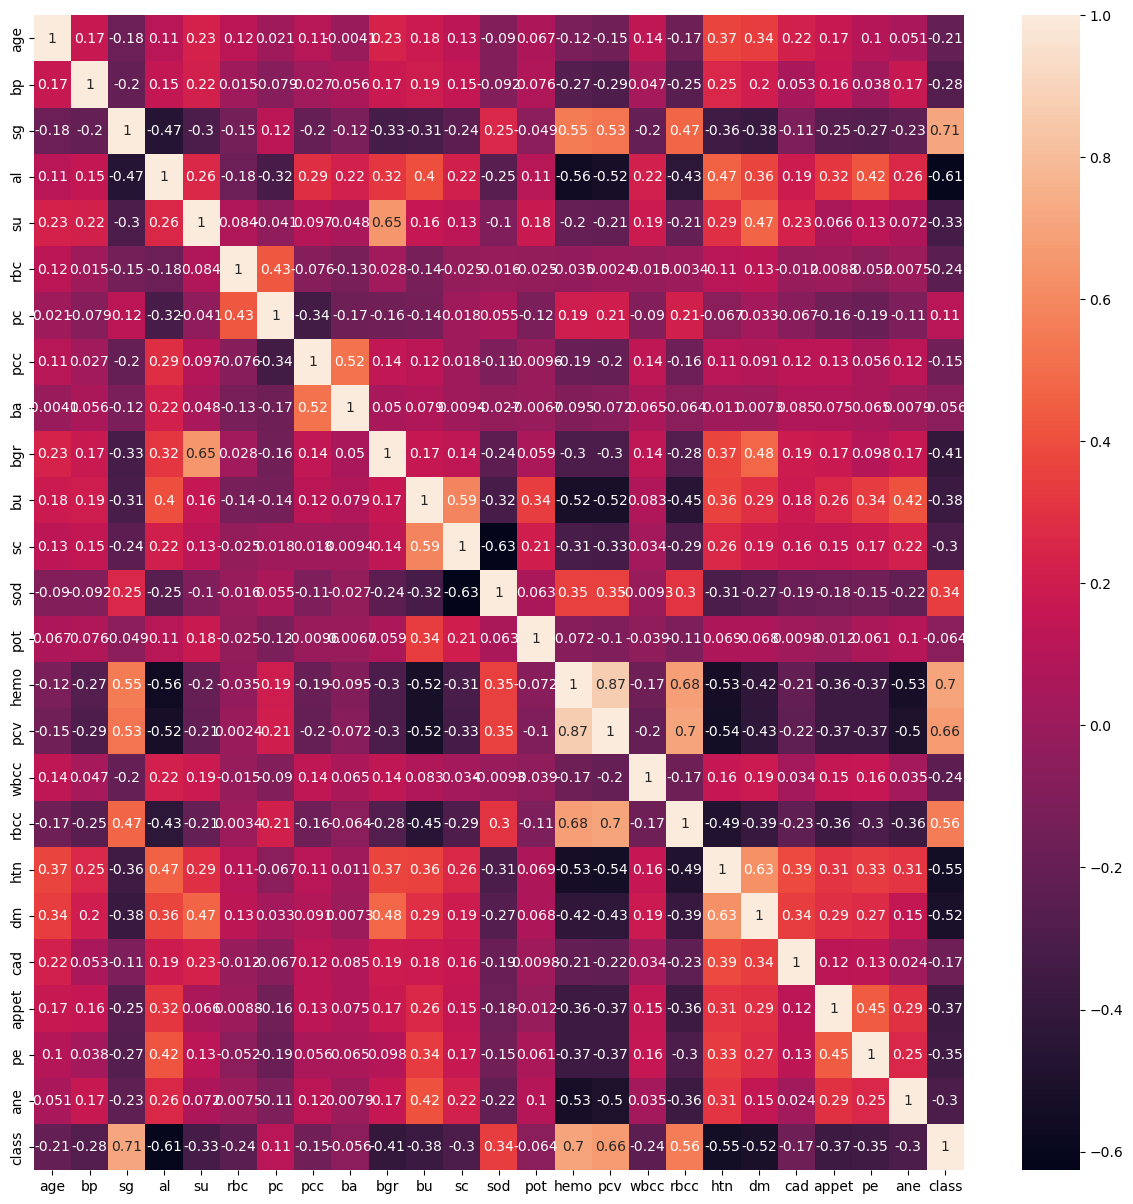

In [118]:
#corrolation matrix
import seaborn as sns
plt.figure(figsize=(15,15))
cor=df.corr()
sns.heatmap(cor,annot=True)

In [119]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold


In [120]:
#input split
X=df.drop(columns=["class"],axis=1)
y=df["class"]


In [121]:
rfecv= RFECV(estimator=RandomForestClassifier(),cv=StratifiedKFold(6),scoring='accuracy')

In [122]:
rfecv.fit(X,y)

RFECV(cv=StratifiedKFold(n_splits=6, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(), scoring='accuracy')

In [123]:
#print("Optimum number of features: %d" % rfecv.n_features_)
print("Optimum number of features: %d" % 21)

Optimum number of features: 15


In [124]:
rfecv.grid_scores_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


array([[0.91044776, 0.88059701, 0.8358209 , 0.89552239, 0.89393939,
        0.87878788],
       [0.98507463, 0.91044776, 0.91044776, 0.98507463, 0.92424242,
        0.90909091],
       [0.97014925, 0.97014925, 0.94029851, 0.97014925, 0.98484848,
        0.96969697],
       [0.98507463, 0.98507463, 0.94029851, 0.97014925, 0.98484848,
        0.98484848],
       [0.98507463, 0.97014925, 0.92537313, 0.97014925, 0.98484848,
        0.98484848],
       [1.        , 0.95522388, 0.94029851, 0.97014925, 0.98484848,
        1.        ],
       [0.98507463, 0.95522388, 0.97014925, 0.97014925, 0.98484848,
        1.        ],
       [0.98507463, 0.97014925, 0.95522388, 0.98507463, 0.98484848,
        1.        ],
       [0.98507463, 0.95522388, 0.98507463, 0.97014925, 0.98484848,
        1.        ],
       [0.98507463, 0.95522388, 0.94029851, 0.97014925, 0.98484848,
        1.        ],
       [0.98507463, 0.97014925, 0.95522388, 0.97014925, 0.98484848,
        1.        ],
       [0.98507463, 0

In [125]:
selected_columns_list=[]
for i,col in zip(range(X.shape[1]),X.columns):
    if rfecv.support_[i]==True:
        selected_columns_list.append(col)
    print(f"{col} selected={rfecv.support_[i]} rank={rfecv.ranking_[i]} score={rfecv.grid_scores_[i]}")

age selected=True rank=1 score=[0.91044776 0.88059701 0.8358209  0.89552239 0.89393939 0.87878788]
bp selected=True rank=1 score=[0.98507463 0.91044776 0.91044776 0.98507463 0.92424242 0.90909091]
sg selected=True rank=1 score=[0.97014925 0.97014925 0.94029851 0.97014925 0.98484848 0.96969697]
al selected=True rank=1 score=[0.98507463 0.98507463 0.94029851 0.97014925 0.98484848 0.98484848]
su selected=False rank=3 score=[0.98507463 0.97014925 0.92537313 0.97014925 0.98484848 0.98484848]
rbc selected=True rank=1 score=[1.         0.95522388 0.94029851 0.97014925 0.98484848 1.        ]
pc selected=True rank=1 score=[0.98507463 0.95522388 0.97014925 0.97014925 0.98484848 1.        ]
pcc selected=False rank=9 score=[0.98507463 0.97014925 0.95522388 0.98507463 0.98484848 1.        ]
ba selected=False rank=10 score=[0.98507463 0.95522388 0.98507463 0.97014925 0.98484848 1.        ]
bgr selected=True rank=1 score=[0.98507463 0.95522388 0.94029851 0.97014925 0.98484848 1.        ]
bu selected=

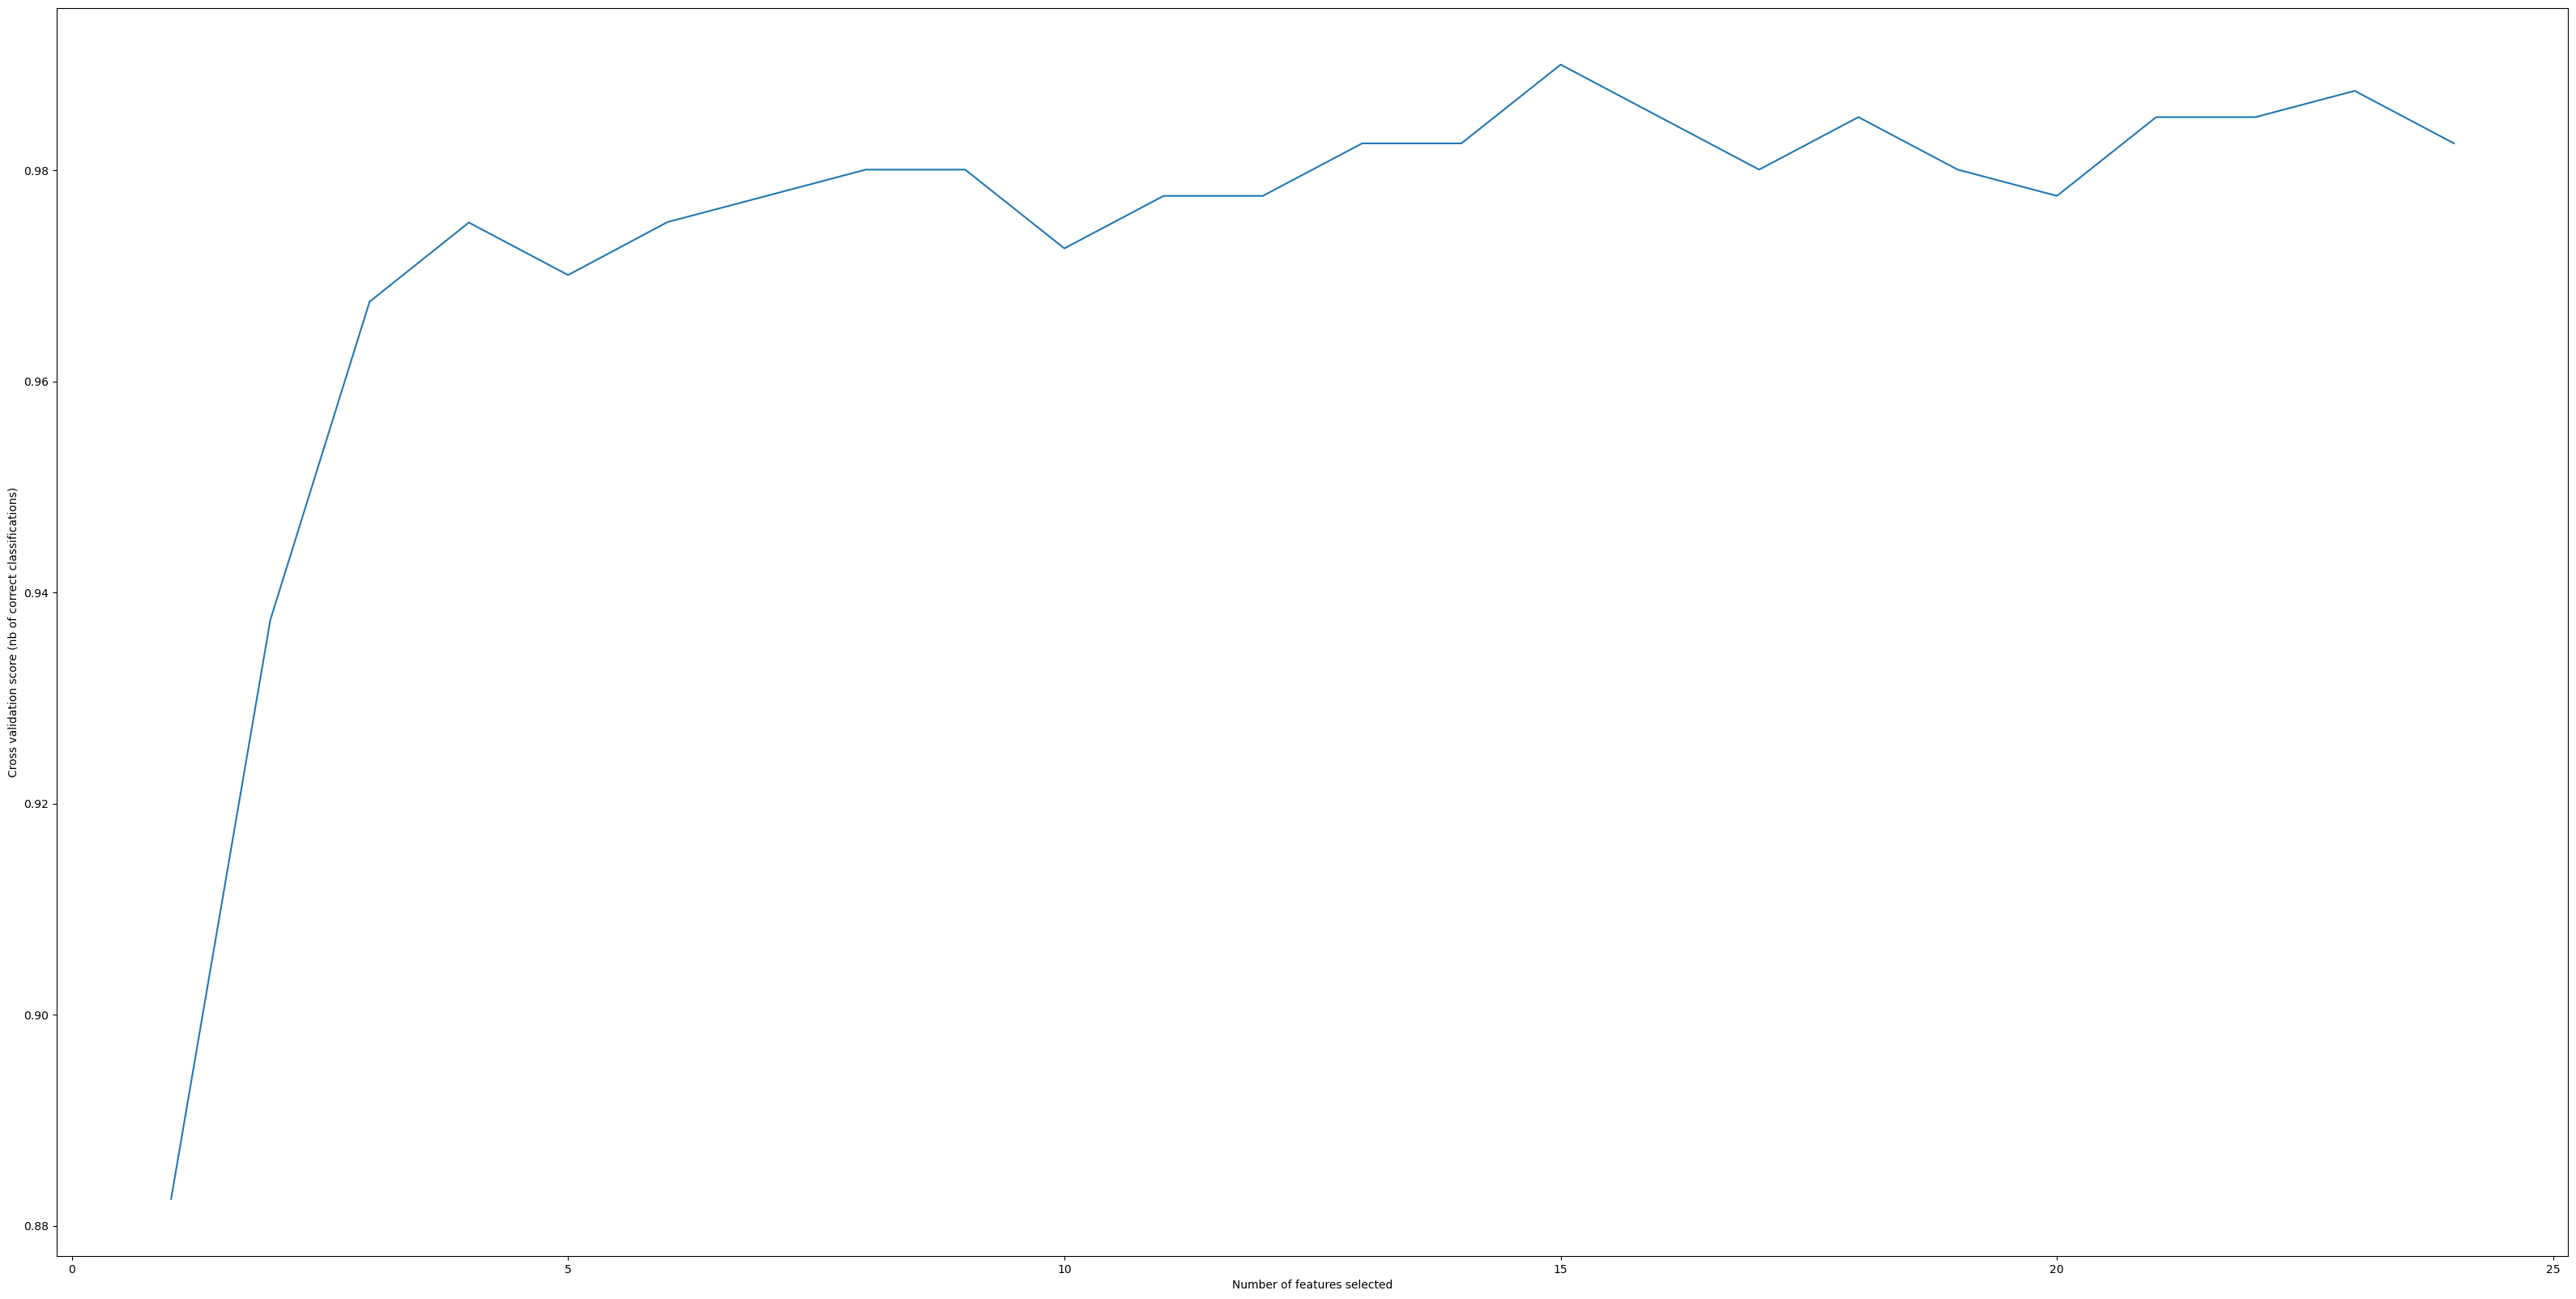

In [126]:
plt.figure(figsize=(40, 20))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) +1), [np.mean(x) for x in rfecv.grid_scores_])
plt.show()

In [127]:
#Keeping the chosen columns by the rfe

In [128]:
for feature in X.columns:
    if feature not in selected_columns_list:
        X.drop(feature, axis=1, inplace=True)    

In [129]:
X

age    bp     sg   al  rbc   pc         bgr    bu   sc    sod  hemo  \
0    48.0  80.0  1.020  1.0  2.0  1.0  121.000000  36.0  1.2  139.0  15.4   
1     7.0  50.0  1.020  4.0  2.0  1.0  113.666667  18.0  0.8  137.0  11.3   
2    62.0  80.0  1.010  2.0  1.0  1.0  423.000000  53.0  1.8  132.0   9.6   
3    48.0  70.0  1.005  4.0  1.0  0.0  117.000000  56.0  3.8  111.0  11.2   
4    51.0  80.0  1.010  2.0  1.0  1.0  106.000000  26.0  1.4  138.0  11.6   
..    ...   ...    ...  ...  ...  ...         ...   ...  ...    ...   ...   
395  55.0  80.0  1.020  0.0  1.0  1.0  140.000000  49.0  0.5  150.0  15.7   
396  42.0  70.0  1.025  0.0  1.0  1.0   75.000000  31.0  1.2  141.0  16.5   
397  12.0  80.0  1.020  0.0  1.0  1.0  100.000000  26.0  0.6  137.0  15.8   
398  17.0  60.0  1.025  0.0  1.0  1.0  114.000000  50.0  1.0  135.0  14.2   
399  58.0  80.0  1.025  0.0  1.0  1.0  131.000000  18.0  1.1  141.0  15.8   

      pcv      rbcc  htn   dm  
0    44.0  5.200000  1.0  1.0  
1    38.0  5.400000  0.0  0.0  
2    31.0  3.966667  0.0  1.0  
3    32.0  3.900000  1.0  0.0  
4    35.0  4.600000  0.0  0.0  
..    ...       ...  ...  ...  
395  47.0  4.900000  0.0  0.0  
396  54.0  6.200000  0.0  0.0  
397  49.0  5.400000  0.0  0.0  
398  51.0  5.900000  0.0  0.0  
399  53.0  6.100000  0.0  0.0  

[400 rows x 15 columns]

In [130]:
#Classification 

In [131]:
# checking for unbalanced dataset
fig = px.pie(df['class'], values=df['class'].value_counts().values, names = df['class'].value_counts().index)
fig

In [132]:
#the data seems balanced

In [133]:
#Defining train and test data
X
y=df["class"]
X

age    bp     sg   al  rbc   pc         bgr    bu   sc    sod  hemo  \
0    48.0  80.0  1.020  1.0  2.0  1.0  121.000000  36.0  1.2  139.0  15.4   
1     7.0  50.0  1.020  4.0  2.0  1.0  113.666667  18.0  0.8  137.0  11.3   
2    62.0  80.0  1.010  2.0  1.0  1.0  423.000000  53.0  1.8  132.0   9.6   
3    48.0  70.0  1.005  4.0  1.0  0.0  117.000000  56.0  3.8  111.0  11.2   
4    51.0  80.0  1.010  2.0  1.0  1.0  106.000000  26.0  1.4  138.0  11.6   
..    ...   ...    ...  ...  ...  ...         ...   ...  ...    ...   ...   
395  55.0  80.0  1.020  0.0  1.0  1.0  140.000000  49.0  0.5  150.0  15.7   
396  42.0  70.0  1.025  0.0  1.0  1.0   75.000000  31.0  1.2  141.0  16.5   
397  12.0  80.0  1.020  0.0  1.0  1.0  100.000000  26.0  0.6  137.0  15.8   
398  17.0  60.0  1.025  0.0  1.0  1.0  114.000000  50.0  1.0  135.0  14.2   
399  58.0  80.0  1.025  0.0  1.0  1.0  131.000000  18.0  1.1  141.0  15.8   

      pcv      rbcc  htn   dm  
0    44.0  5.200000  1.0  1.0  
1    38.0  5.400000  0.0  0.0  
2    31.0  3.966667  0.0  1.0  
3    32.0  3.900000  1.0  0.0  
4    35.0  4.600000  0.0  0.0  
..    ...       ...  ...  ...  
395  47.0  4.900000  0.0  0.0  
396  54.0  6.200000  0.0  0.0  
397  49.0  5.400000  0.0  0.0  
398  51.0  5.900000  0.0  0.0  
399  53.0  6.100000  0.0  0.0  

[400 rows x 15 columns]

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1024)

In [135]:
#SVM + RBF(Radial Basis Function)

In [136]:
#The rbf requires the data to be centred and scaled

In [137]:
#We will use the standardscaling
scale = StandardScaler()
X_train_scaled=scale.fit_transform(X_train)
X_test_scaled=scale.fit_transform(X_test)

In [138]:
# Grid Search for SVM

hyperparameters = {
    'C': [1, 10, 100, 1000],  
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
    'kernel': ['rbf']}

svm = SVC()

svm_cv = GridSearchCV(estimator=svm, param_grid=hyperparameters, cv=10, n_jobs=-1)

svm_cv.fit(X_train, y_train)

svm_cv.best_params_

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

In [139]:
svm = SVC(C=100, gamma=0.0001, kernel='rbf') #C and gamma are parameters that infulence the rbf method
svm.fit(X_train, y_train)

SVC(C=100, gamma=0.0001)

In [140]:
y_pred_svm = svm.predict(X_test)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94        62
         1.0       0.92      0.89      0.91        38

    accuracy                           0.93       100
   macro avg       0.93      0.92      0.93       100
weighted avg       0.93      0.93      0.93       100



In [141]:
#Plotting the confusion Matrix

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



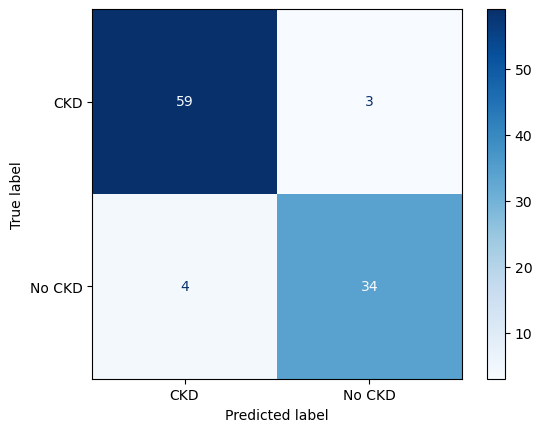

In [142]:
confusion_matrix(y_pred_svm ,
                     y_test
                     )
plot_confusion_matrix(svm, X_test, y_test, cmap=plt.cm.Blues,display_labels=['CKD','No CKD'])

In [143]:
#Plotting the Dicision boundary

In [144]:
#We can't draw a 19 dimensinal graph so we need to reduce the dimensions to 2 so we will use the PCA and take PC1 and PC2.

In [145]:
pca=PCA(svd_solver='full')

In [146]:
Principal_components=pca.fit_transform(X_train_scaled)
#number of calculated components
print(pca.n_components_)
#print PCs
print(Principal_components)

15
[[ 2.69385087 -0.54171246 -1.68028646 ... -0.23209561  0.96884798
  -0.30924758]
 [ 3.63229228 -1.40893188  2.18566161 ...  0.05290631  0.16779036
  -0.29281336]
 [ 5.35103501  2.19374351 -0.15599962 ...  0.93788526  0.84093782
   0.17800538]
 ...
 [-2.29882531 -0.50577665  0.40372787 ... -0.22162852 -0.03977541
  -0.19031018]
 [ 1.09529263  0.75827349  0.45990708 ... -0.75461548  0.71921886
  -0.13705893]
 [ 1.67548163 -1.31920301  0.48534966 ...  0.23501276  0.20356952
   0.07509113]]


In [147]:
np.set_printoptions(3)
print(pca.explained_variance_ratio_)


[0.36  0.115 0.081 0.069 0.064 0.052 0.048 0.042 0.037 0.031 0.027 0.025
 0.023 0.018 0.009]


In [148]:
n = df.shape[0]
p=df.shape[1]
eigval = (n-1)/n*pca.explained_variance_
print(eigval)
#the eigenvalues of an axis reflect the variation ratio of information

[5.404 1.732 1.217 1.031 0.958 0.781 0.721 0.634 0.556 0.462 0.409 0.37
 0.341 0.269 0.128]


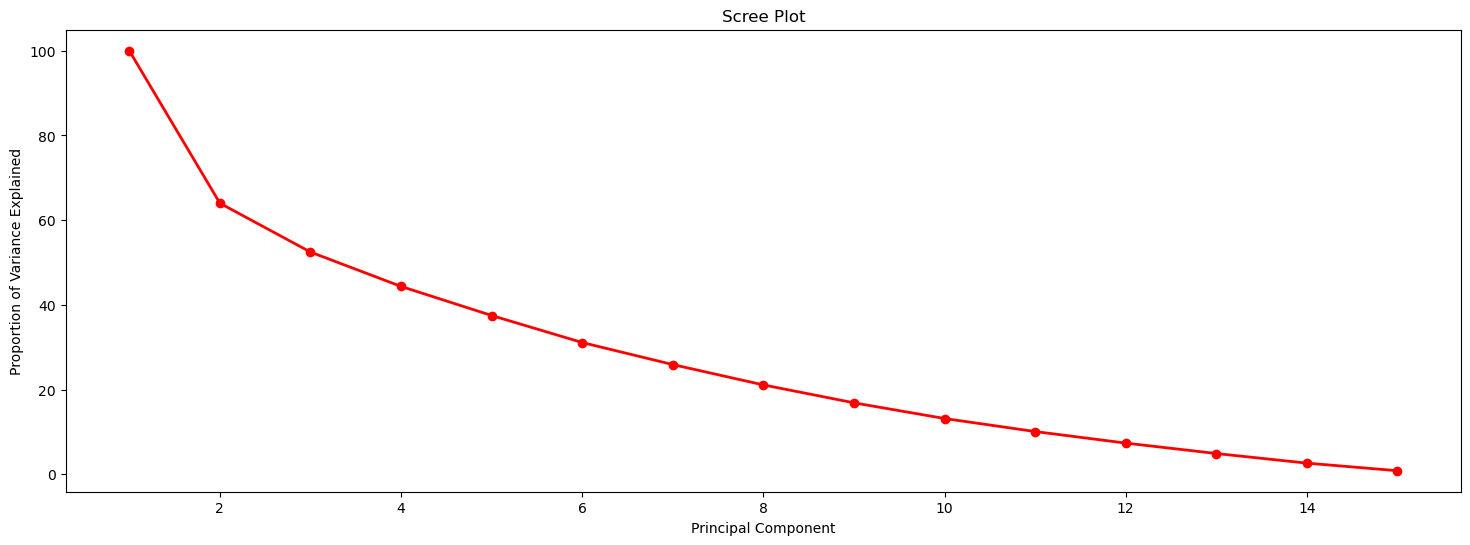

In [149]:
#show the scree plot of the PCA:
aze=np.cumsum(pca.explained_variance_ratio_[::-1])[::-1]
plt.figure(figsize=(18,6))
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, aze*100, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [150]:
#Drawing the graph with PC1 and PC2

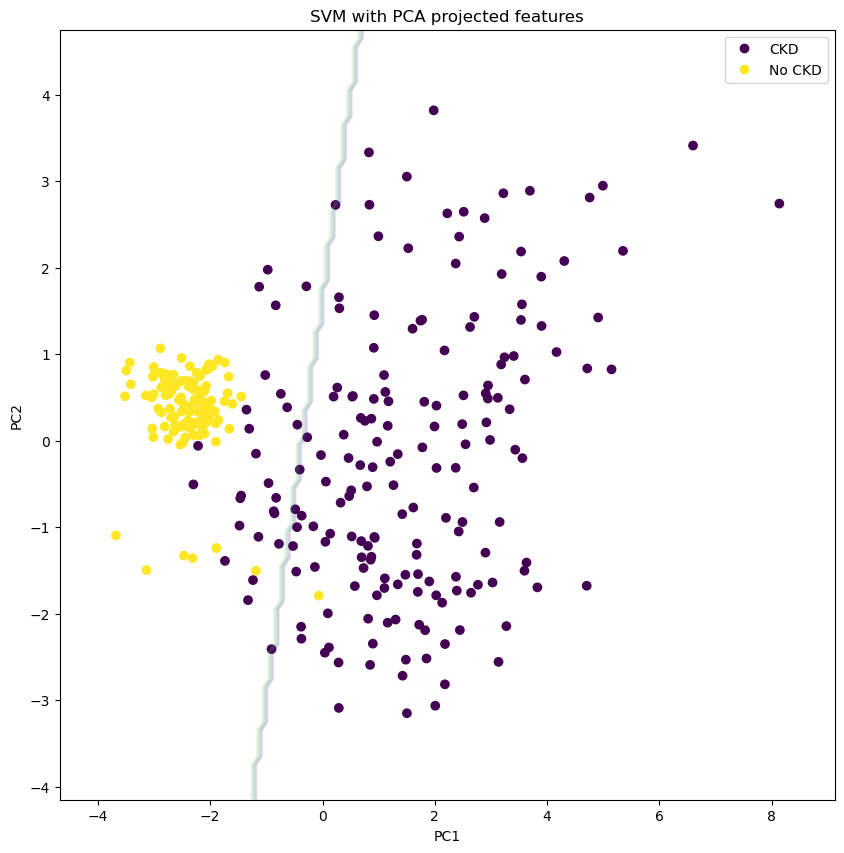

In [151]:
X_train_pca=pca.fit_transform(X_train_scaled)
train_pc1_coords=X_train_pca[:,0]
train_pc2_coords=X_train_pca[:,1]

scaler = StandardScaler()
scaler.fit(np.column_stack((train_pc1_coords,train_pc2_coords)))
pca_train_scaled = scaler.transform(np.column_stack((train_pc1_coords,train_pc2_coords)))


clf_svm = SVC(random_state=42,C=100, gamma=0.0001)
clf_svm.fit(pca_train_scaled,y_train)

test_pc1_coords = Principal_components[:,0]
test_pc2_coords = Principal_components[:,1]
#Lets create a matrix of points that we can use to show the discion regions.
x_min = test_pc1_coords.min()-1
x_max = test_pc1_coords.max()+1

y_min = test_pc2_coords.min()-1
y_max = test_pc2_coords.max()+1

xx,yy = np.meshgrid(np.arange(start=x_min,stop=x_max,step=0.1),
                   np.arange(start=y_min,stop=y_max,step=0.1))

Z=clf_svm.predict(np.column_stack((xx.ravel(),yy.ravel())))
Z=Z.reshape(xx.shape)
fig,ax=plt.subplots(figsize=(10,10))

ax.contour(xx,yy,Z,alpha=0.1)

scatter=ax.scatter(test_pc1_coords,test_pc2_coords,c=y_train)
legend=ax.legend(scatter.legend_elements()[0],
                scatter.legend_elements()[1],
                loc="upper right")

legend.get_texts()[0].set_text("CKD")
legend.get_texts()[1].set_text("No CKD")

ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title("SVM with PCA projected features")
plt.show()

In [152]:
#Knn

In [153]:
# Grid Search for KNN

hyperparameters = {
    'leaf_size' : list(range(1,30)),
    'n_neighbors' : list(range(1,25))
}

knn = KNeighborsClassifier()

knn_cv = GridSearchCV(estimator=knn, param_grid=hyperparameters, cv=10, n_jobs=-1)

knn_cv.fit(X_train_scaled, y_train)

knn_cv.best_params_

{'leaf_size': 1, 'n_neighbors': 1}

In [154]:
knn = KNeighborsClassifier(leaf_size=1, p=2, n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=1, n_neighbors=1)

In [155]:
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn)) ### precision is not good

              precision    recall  f1-score   support

         0.0       0.82      0.85      0.83        62
         1.0       0.74      0.68      0.71        38

    accuracy                           0.79       100
   macro avg       0.78      0.77      0.77       100
weighted avg       0.79      0.79      0.79       100



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [156]:
#Plot knn

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



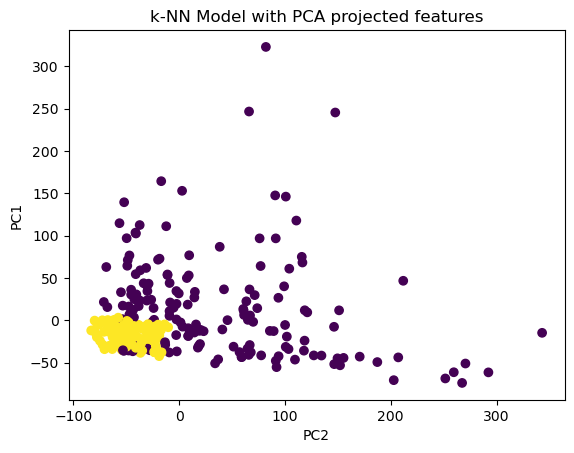

In [157]:
# Reduce the dimensionality of the data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Train a k-NN model
model = KNeighborsClassifier()
model.fit(X_pca, y_train)

# Make predictions on the data
y_pred = model.predict(X_pca)

# Create a scatter plot of the predictions
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)

# Add labels and title
plt.xlabel("PC2")
plt.ylabel("PC1")
plt.title("k-NN Model with PCA projected features")

# Show the plot
plt.show()


In [158]:
X_train_pca=pca.fit_transform(X_train_scaled)
train_pc1_coords=X_train_pca[:,0]
train_pc2_coords=X_train_pca[:,1]

scaler = StandardScaler()
scaler.fit(np.column_stack((train_pc1_coords,train_pc2_coords)))
pca_train_scaled = scaler.transform(np.column_stack((train_pc1_coords,train_pc2_coords)))

knn.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=1, n_neighbors=1)

In [159]:
#Decision Tree

In [160]:
# Grid Search for Decision Tree

hyperparameters = {
    'max_features': ['sqrt', 'log2'],
    'ccp_alpha': [0.1, 0.01, 0.001],
    'max_depth' : [5, 6, 7, 8, 9],
    'criterion' :['gini', 'entropy']}

decision_tree = DecisionTreeClassifier()

decision_tree_cv = GridSearchCV(estimator=decision_tree, param_grid=hyperparameters, cv=10, n_jobs=-1)

decision_tree_cv.fit(X_train, y_train)

decision_tree_cv.best_params_

{'ccp_alpha': 0.01,
 'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'log2'}

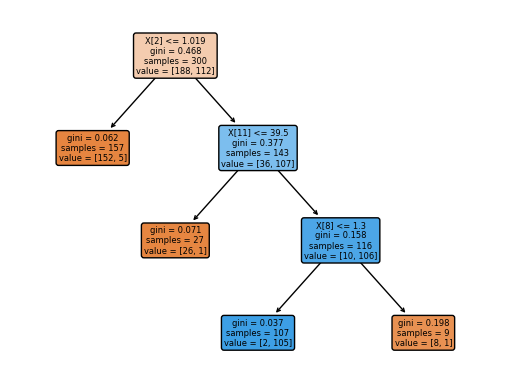

<Figure size 10000x5000 with 0 Axes>

In [161]:
decision_tree = DecisionTreeClassifier(ccp_alpha=0.01, max_depth=5, max_features='sqrt', criterion="gini")
decision_tree.fit(X_train, y_train)
plot_tree(decision_tree, filled=True, fontsize=6, rounded = True, max_depth=4)
fig = plt.figure(figsize=(100,50))
plt.show()

In [162]:
y_pred_dt = decision_tree.predict(X_test)
print(classification_report(y_pred_dt, y_test))

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96        61
         1.0       0.95      0.92      0.94        39

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



In [163]:
#Random Forest

In [164]:
# Grid Search for Random Forest

hyperparameters = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
random_forest = RandomForestClassifier()

random_forest_cv = GridSearchCV(estimator=random_forest, param_grid=hyperparameters, cv=10, n_jobs=-1)

random_forest_cv.fit(X_train, y_train)

random_forest_cv.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 500}

In [165]:
random_forest = RandomForestClassifier(criterion= 'gini', max_depth=4, max_features= 'auto', n_estimators= 200)
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=200)

In [166]:
y_pred_rf = random_forest.predict(X_test)
print(classification_report(y_pred_rf, y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        63
         1.0       0.97      1.00      0.99        37

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [167]:
#Comparision of ther preformance of the used classification algorithms : SVM,KNN,Decision Trees, Random Forest

In [168]:
#Defining precison score for each model
ps_svm=precision_score(y_test, y_pred_svm)
ps_knn=precision_score(y_test, y_pred_knn)
ps_dt=precision_score(y_pred_dt, y_test)
ps_rf=precision_score(y_pred_rf, y_test)
precision_score_List=[ps_svm,ps_knn,ps_dt,ps_rf]
#Defining recall for each model
recall_svm=recall_score(y_test, y_pred_svm)
recall_knn=recall_score(y_test, y_pred_knn)
recall_dt=recall_score(y_pred_dt, y_test)
recall_rf=recall_score(y_pred_rf, y_test)
recall_List=[recall_svm,recall_knn,recall_dt,recall_rf]
#Defining recall for each model
f1_score_svm=f1_score(y_test, y_pred_svm)
f1_score_knn=f1_score(y_test, y_pred_knn)
f1_score_dt=f1_score(y_pred_dt, y_test)
f1_score_rf=f1_score(y_pred_rf, y_test)
f1_score_List=[f1_score_svm,f1_score_knn,f1_score_dt,f1_score_rf]

In [169]:
Algorithm_Name_List=["SVM","KNN","Decision Tree","Random Forest"]
metrics_List=["precison score","recall","f1-score"]

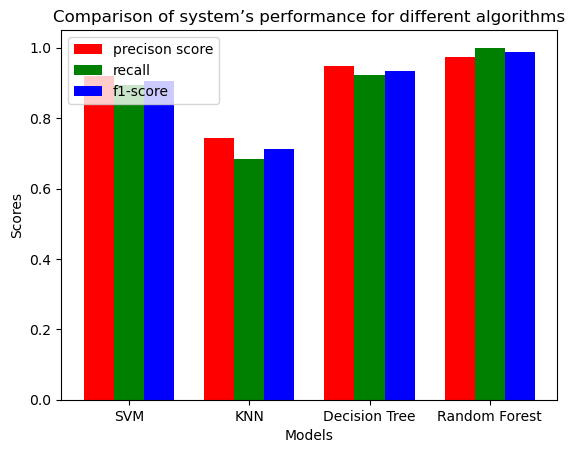

In [170]:
N = 4
ind = np.arange(N)
width = 0.25


bar1 = plt.bar(ind, precision_score_List, width, color = 'r')


bar2 = plt.bar(ind+width, recall_List, width, color='g')


bar3 = plt.bar(ind+width*2, f1_score_List, width, color = 'b')


plt.xlabel("Models")
plt.ylabel('Scores')
plt.title("Comparison of system’s performance for different algorithms")

plt.xticks(ind+width,Algorithm_Name_List)
plt.legend( (bar1, bar2, bar3), (metrics_List) )
plt.show()
